In [2]:
import pandas as pd
heart_data=pd.read_csv(r"heart_disease_data.csv")
heart_data.head(1)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0


In [3]:
heart_data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [4]:
num_cols = ["id", "age", "trestbps", "chol", "thalch", "oldpeak", "ca"]

for num in num_cols:
    heart_data[num] = pd.to_numeric(heart_data[num], errors="coerce")

In [5]:
for num in num_cols:
    num_unique=heart_data[num].unique()
    print(num_unique)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [6]:
for col in num_cols:
    heart_data[num].fillna(heart_data[num].median(), inplace=True)


C:\Users\gokul\AppData\Local\Temp\ipykernel_5364\3151224986.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data[num].fillna(heart_data[num].median(), inplace=True)
C:\Users\gokul\AppData\Local\Temp\ipykernel_5364\3151224986.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [7]:
cat_cols=["sex", "dataset",	"cp", "fbs", "restecg", "exang", "slope", "thal"]

for cat in cat_cols:
    heart_data[cat].fillna(heart_data[cat].mode(),inplace=True)

C:\Users\gokul\AppData\Local\Temp\ipykernel_5364\2057675784.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data[cat].fillna(heart_data[cat].mode(),inplace=True)


In [8]:
for cat in cat_cols:
    cat_unique=heart_data[cat].unique()
    print(cat_unique)

['Male' 'Female']
['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
[True False nan]
['lv hypertrophy' 'normal' 'st-t abnormality' nan]
[False True nan]
['downsloping' 'flat' 'upsloping' nan]
['fixed defect' 'normal' 'reversable defect' nan]


In [9]:
heart_data["num"] = heart_data["num"].apply(lambda x: 1 if x > 0 else 0)

In [10]:
heart_data.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [11]:
heart_data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca            0
thal        486
num           0
dtype: int64

In [12]:
heart_data.select_dtypes(include=["int","float"]).columns

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')

In [13]:
heart_data.select_dtypes(include=["object"]).columns

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

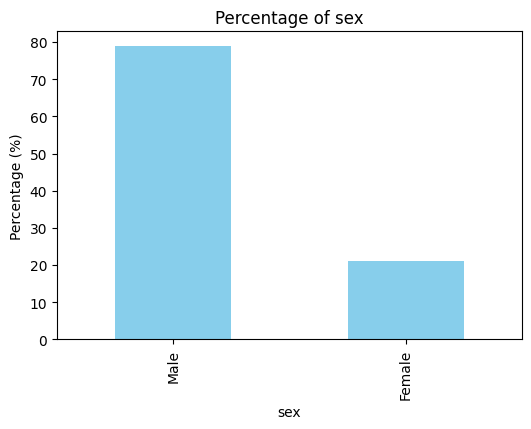

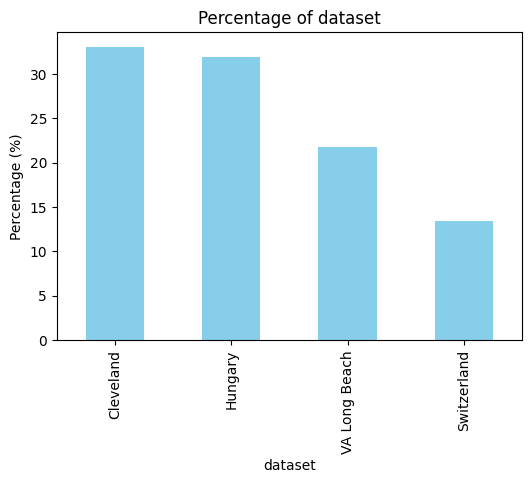

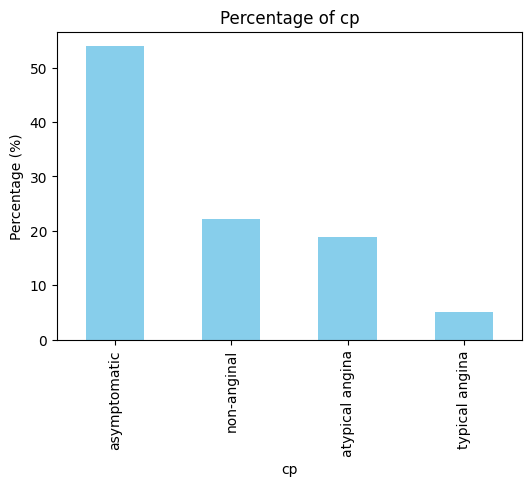

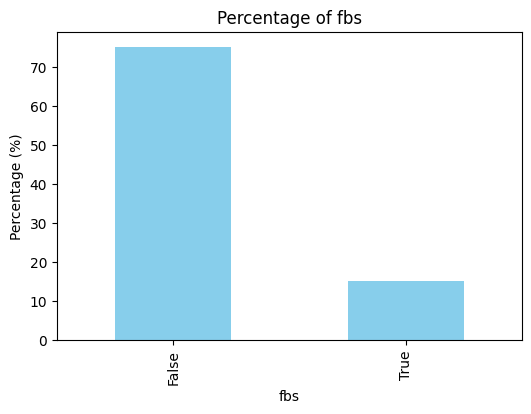

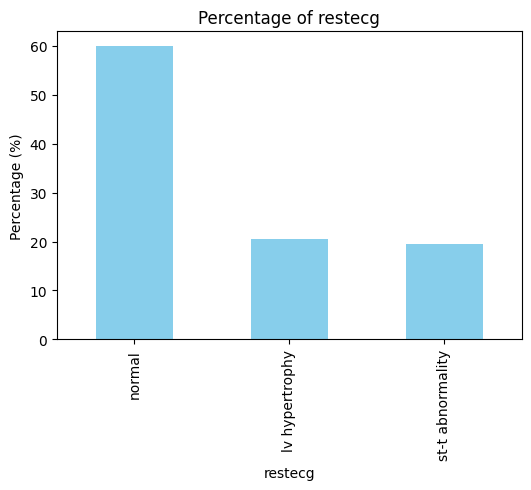

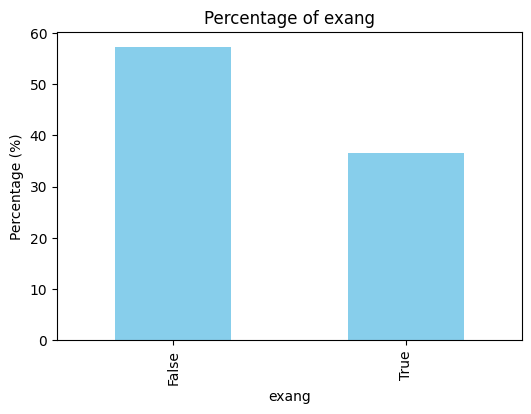

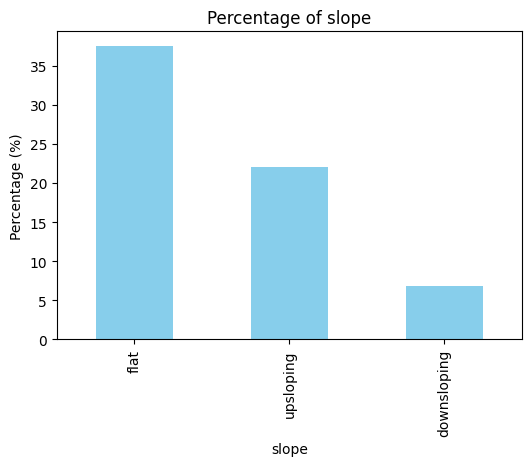

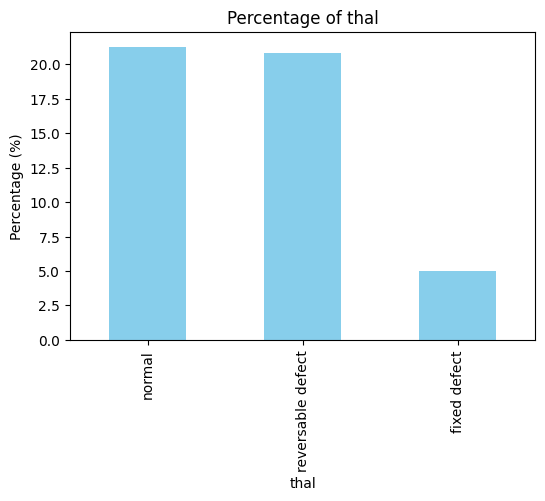

In [14]:
import matplotlib.pyplot as plt

for cat in cat_cols:
    percent = heart_data[cat].value_counts() / len(heart_data) * 100
    percent.plot(kind="bar", figsize=(6,4), color="skyblue")
    plt.title(f"Percentage of {cat}")
    plt.ylabel("Percentage (%)")
    plt.show()

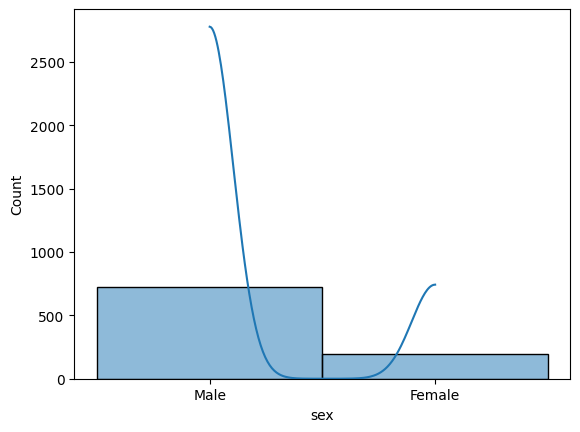

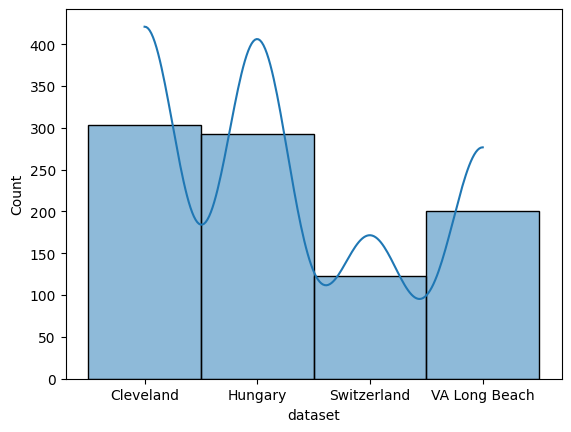

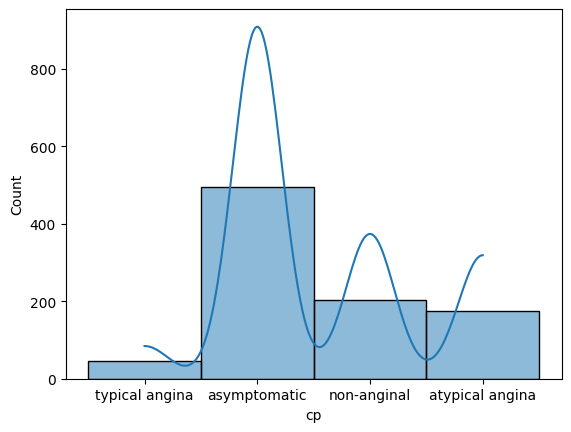

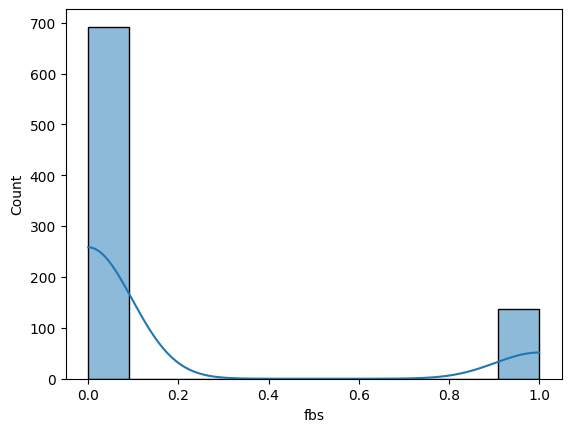

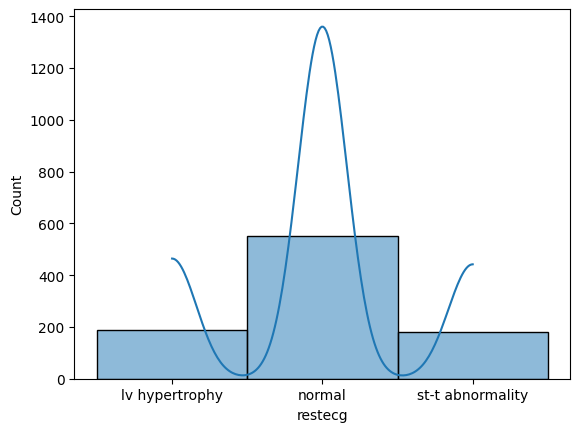

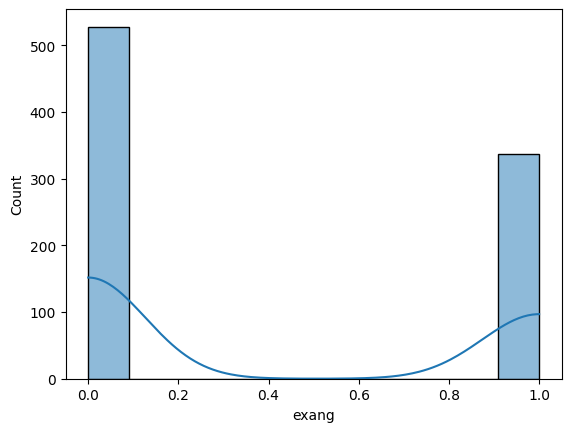

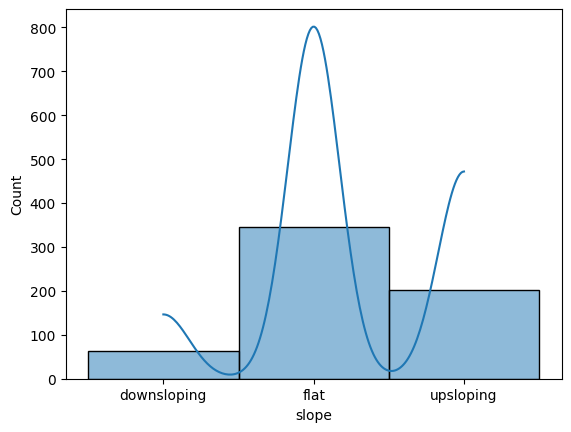

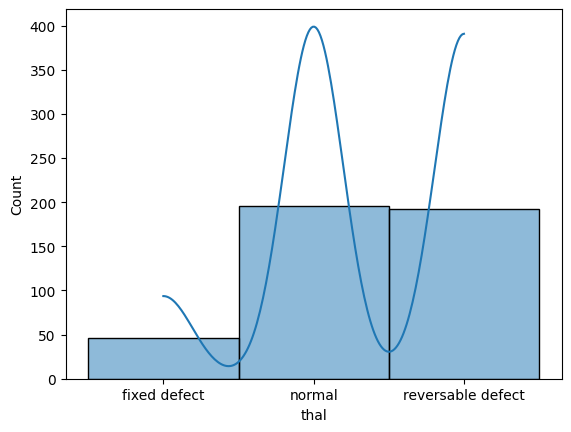

In [15]:
import seaborn as sns

for cat in cat_cols:
    sns.histplot(heart_data[cat],kde=True)
    plt.show()

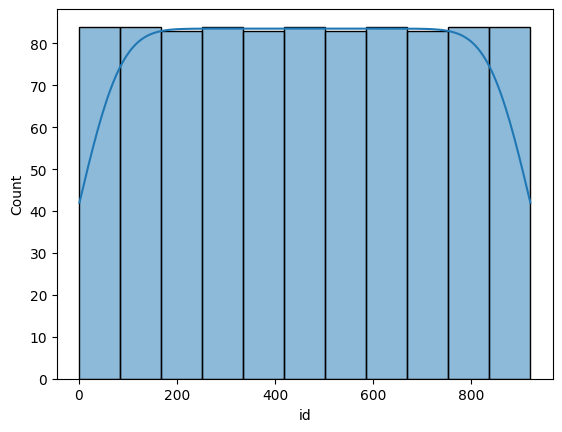

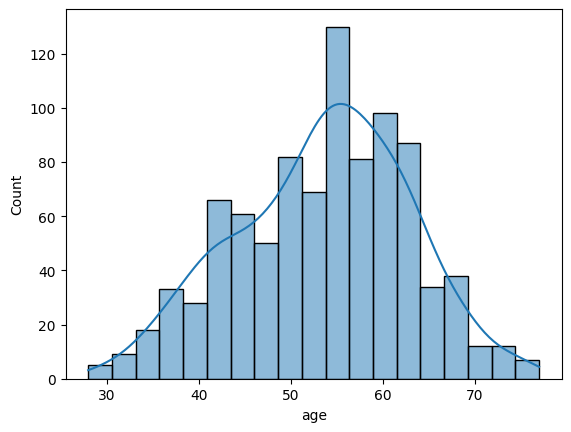

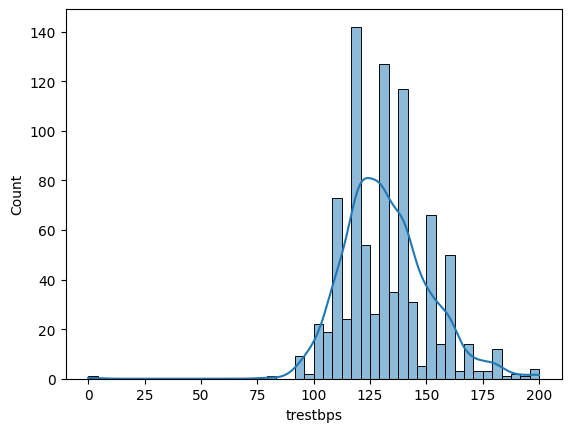

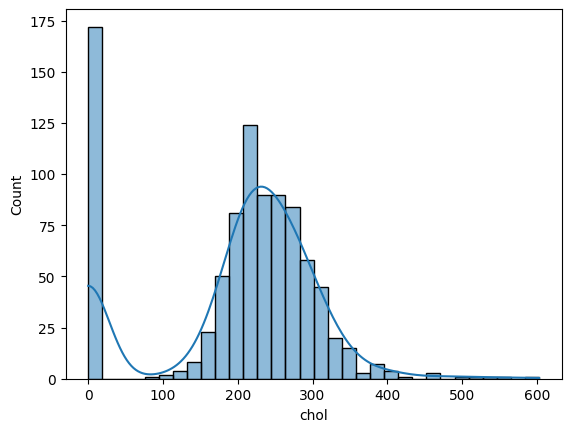

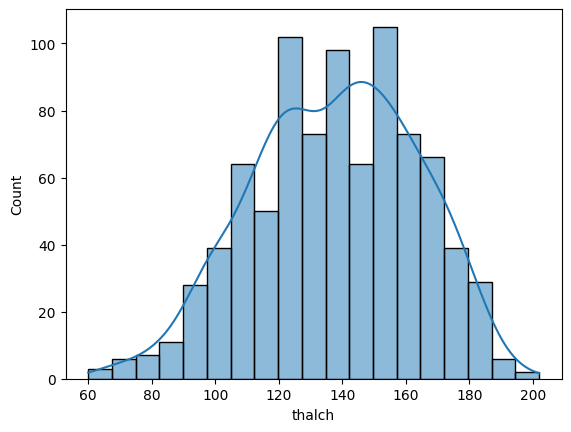

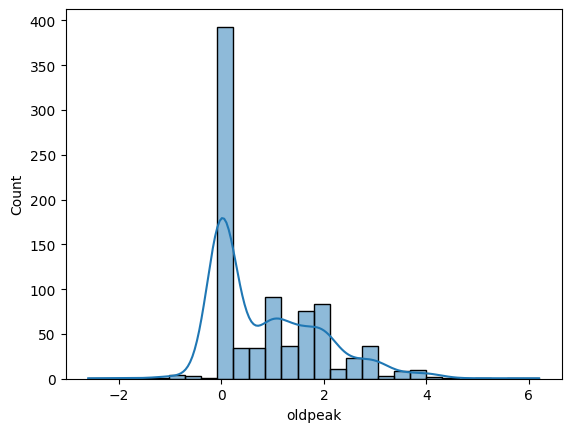

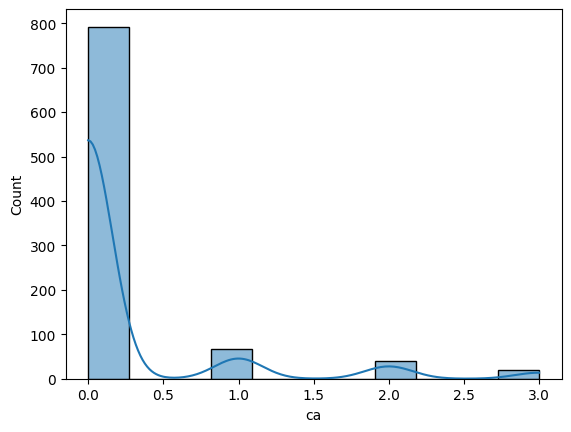

In [16]:


for num in num_cols:
    sns.histplot(heart_data[num],kde=True)
    plt.show()

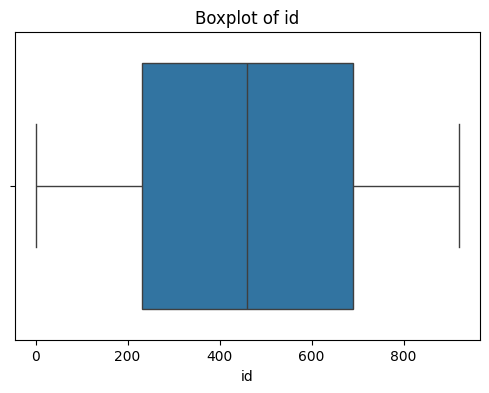

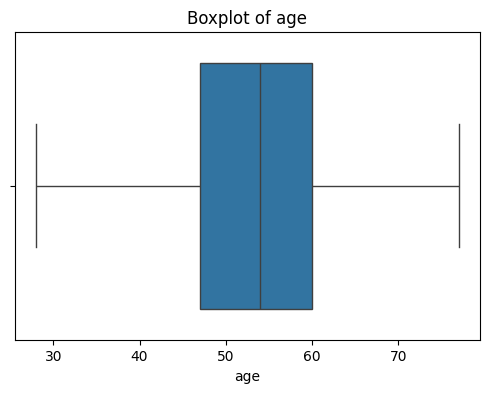

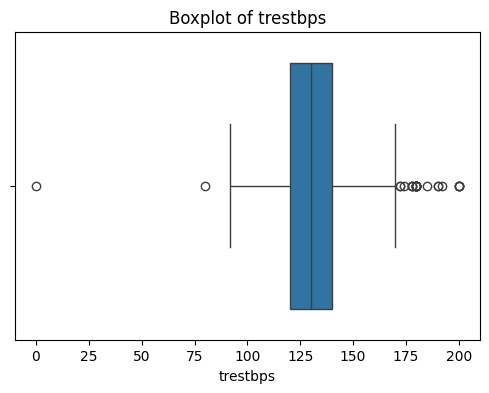

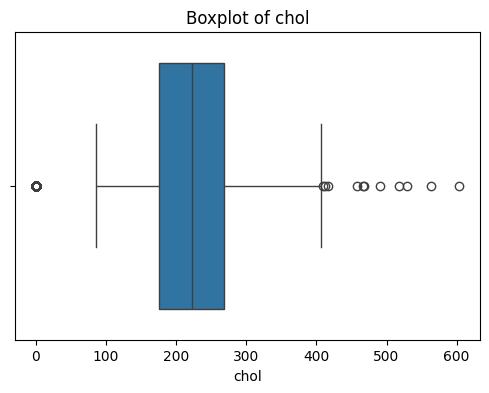

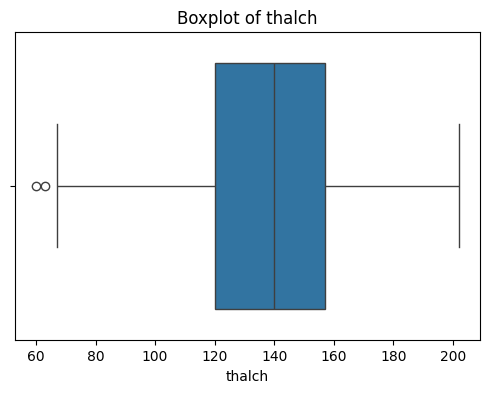

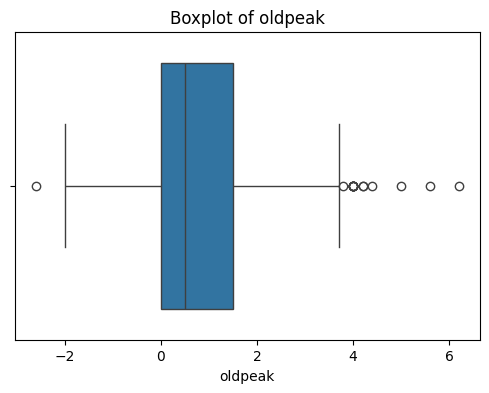

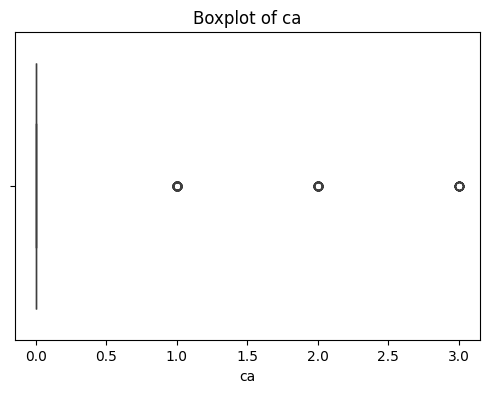

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

for num in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=heart_data[num])
    plt.title(f"Boxplot of {num}")
    plt.show()


In [18]:
for cat in cat_cols:
    print(f"\n{cat}")
    print(heart_data[cat].value_counts(normalize=True) * 100)



sex
sex
Male      78.913043
Female    21.086957
Name: proportion, dtype: float64

dataset
dataset
Cleveland        33.043478
Hungary          31.847826
VA Long Beach    21.739130
Switzerland      13.369565
Name: proportion, dtype: float64

cp
cp
asymptomatic       53.913043
non-anginal        22.173913
atypical angina    18.913043
typical angina      5.000000
Name: proportion, dtype: float64

fbs
fbs
False    83.373494
True     16.626506
Name: proportion, dtype: float64

restecg
restecg
normal              60.021786
lv hypertrophy      20.479303
st-t abnormality    19.498911
Name: proportion, dtype: float64

exang
exang
False    61.040462
True     38.959538
Name: proportion, dtype: float64

slope
slope
flat           56.464812
upsloping      33.224223
downsloping    10.310966
Name: proportion, dtype: float64

thal
thal
normal               45.161290
reversable defect    44.239631
fixed defect         10.599078
Name: proportion, dtype: float64


In [19]:
num_cols_check = ["trestbps", "chol", "thalch", "oldpeak","ca"]

for col in num_cols_check:
    Q1 = heart_data[col].quantile(0.25)
    Q3 = heart_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    heart_data[col] = heart_data[col].clip(lower, upper)

print("Outliers capped successfully ✅")


Outliers capped successfully ✅


In [20]:

from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    heart_data[col] = le.fit_transform(heart_data[col])
    encoders[col] = le 

In [21]:
heart_data.dtypes

id            int64
age           int64
sex           int32
dataset       int32
cp            int32
trestbps    float64
chol        float64
fbs           int32
restecg       int32
thalch      float64
exang         int32
oldpeak     float64
slope         int32
ca          float64
thal          int32
num           int64
dtype: object

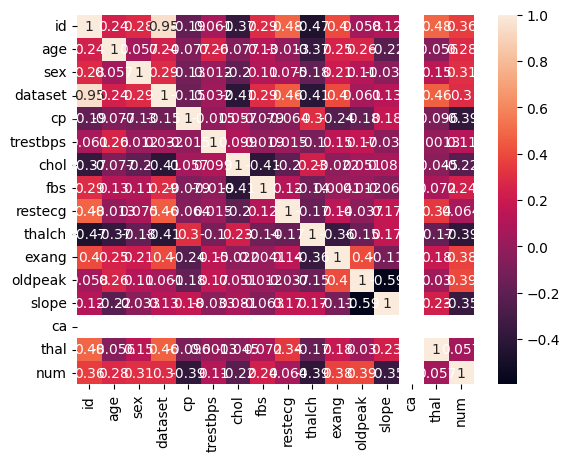

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(heart_data.corr(), annot=True)
plt.show()


In [23]:
x=heart_data.drop("num",axis=1)
y=heart_data["num"]

print(x)

      id  age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
0      1   63    1        0   3     145.0  233.0    1        0   150.0      0   
1      2   67    1        0   0     160.0  286.0    0        0   108.0      1   
2      3   67    1        0   0     120.0  229.0    0        0   129.0      1   
3      4   37    1        0   2     130.0  250.0    0        1   187.0      0   
4      5   41    0        0   1     130.0  204.0    0        0   172.0      0   
..   ...  ...  ...      ...  ..       ...    ...  ...      ...     ...    ...   
915  916   54    0        3   0     127.0  333.0    1        2   154.0      0   
916  917   62    1        3   3       NaN  139.0    0        2     NaN      2   
917  918   55    1        3   0     122.0  223.0    1        2   100.0      0   
918  919   58    1        3   0       NaN  385.0    1        0     NaN      2   
919  920   62    1        3   1     120.0  254.0    0        0    93.0      1   

     oldpeak  slope   ca  t

In [24]:
print(y)

0      0
1      1
2      1
3      0
4      0
      ..
915    1
916    0
917    1
918    0
919    1
Name: num, Length: 920, dtype: int64


In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,stratify=y,random_state=42)

In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_train = imputer.fit_transform(x_train)
X_test = imputer.transform(x_test)

In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_res).value_counts())

Before SMOTE: num
1    407
0    329
Name: count, dtype: int64
After SMOTE: num
1    407
0    407
Name: count, dtype: int64


In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    class_weight="balanced",
    random_state=42
)

model.fit(X_res, y_res)
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score,classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9021739130434783
              precision    recall  f1-score   support

           0       0.92      0.85      0.89        82
           1       0.89      0.94      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



In [31]:
import joblib

model_path = "heart_model.pkl"
model_loaded = joblib.load(model_path)

# If saved as dictionary
if isinstance(model_loaded, dict):
    model = model_loaded["model"]
    imputer = model_loaded.get("imputer")
    encoders = model_loaded.get("encoders", {})
    columns = model_loaded.get("columns", [])
else:
    # If only model saved
    model = model_loaded
    imputer = None
    encoders = {}
    columns = []
